<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M4_1_ann_intro_v3_Exercise_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train ANN through Customer Churn data with 1 and 2 hidden layers!

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt  # Plotting library



data_raw = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/customer_churn_data.csv')


![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/torch_nn_23_31.png)

In [38]:
data_raw.head()

,customerID,gender_encod,SeniorCitizen,MonthlyCharges,TotalCharges,churn_encod
0,7590-VHVEG,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,56.95,1889.50,0
2,3668-QPYBK,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,42.30,1840.75,0
4,9237-HQITU,0,0,70.70,151.65,1


In [39]:
#Define the scaler and divide cateogrical from numerical data
scaler = MinMaxScaler()
numerical_col = data_raw[['MonthlyCharges', 'TotalCharges']]
categorical_col = data_raw.drop(columns=['MonthlyCharges', 'TotalCharges'])

#Scaling
data_scaled = scaler.fit_transform(numerical_col)
data_s = pd.DataFrame(data_scaled, columns=['MonthlyCharges_scaled', 'TotalCharges_scaled'] )

In [40]:
#Merge back the scaled data with the rest
final_data = pd.concat([categorical_col,data_s], axis=1)

In [41]:
final_data.head(5)

,customerID,gender_encod,SeniorCitizen,churn_encod,MonthlyCharges_scaled,TotalCharges_scaled
0,7590-VHVEG,0,0,0,0.115423,0.001275
1,5575-GNVDE,1,0,0,0.385075,0.215867
2,3668-QPYBK,1,0,1,0.354229,0.010310
3,7795-CFOCW,1,0,0,0.239303,0.210241
4,9237-HQITU,0,0,1,0.521891,0.015330


In [162]:
final_data.churn_encod.value_counts()

0    5163
1    1869
Name: churn_encod, dtype: int64

In [42]:
final_data.columns

Index(['customerID', 'gender_encod', 'SeniorCitizen', 'churn_encod',
       'MonthlyCharges_scaled', 'TotalCharges_scaled'],
      dtype='object')

In [436]:
from sklearn.model_selection import train_test_split

X = final_data[['gender_encod', 'SeniorCitizen', 'MonthlyCharges_scaled', 'TotalCharges_scaled']].values
y = final_data['churn_encod'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [437]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data and labels
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the resampled data
# You can split this resampled data into train and validation sets for model training
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

# Train your model on the resampled data


In [438]:
X_train_resampled.shape

(6608, 4)

In [439]:
# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [440]:
X_train_tensor.shape

torch.Size([6608, 4])

In [441]:
X_test_tensor.shape

torch.Size([1407, 4])

In [442]:
X_train_tensor[i]

tensor([1.0000, 0.0000, 0.0299, 0.0800])

In [444]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.05

# # Initializing Parameters
# w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net3 = torch.nn.Sequential(torch.nn.Linear(4, 10),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.10),

                                #  torch.nn.Linear(10, 4),
                                #  torch.nn.ReLU(),
                                #  torch.nn.Dropout(0.10),

                                 torch.nn.Linear(10, 1),
                                 torch.nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net3.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net3.forward(X_train_tensor[i].reshape(1, 4))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


      # # Display the loss for the current sample
      # print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")


<ipython-input-444-86a5156ea947>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.5862
--------------------------------------------------


Epoch 2 Average Loss: 0.5614
--------------------------------------------------


Epoch 3 Average Loss: 0.5546
--------------------------------------------------


Epoch 4 Average Loss: 0.5504
--------------------------------------------------


Epoch 5 Average Loss: 0.5445
--------------------------------------------------


Epoch 6 Average Loss: 0.5447
--------------------------------------------------


Epoch 7 Average Loss: 0.5444
--------------------------------------------------


Epoch 8 Average Loss: 0.5420
--------------------------------------------------


Epoch 9 Average Loss: 0.5387
--------------------------------------------------


Epoch 10 Average Loss: 0.5395
--------------------------------------------------



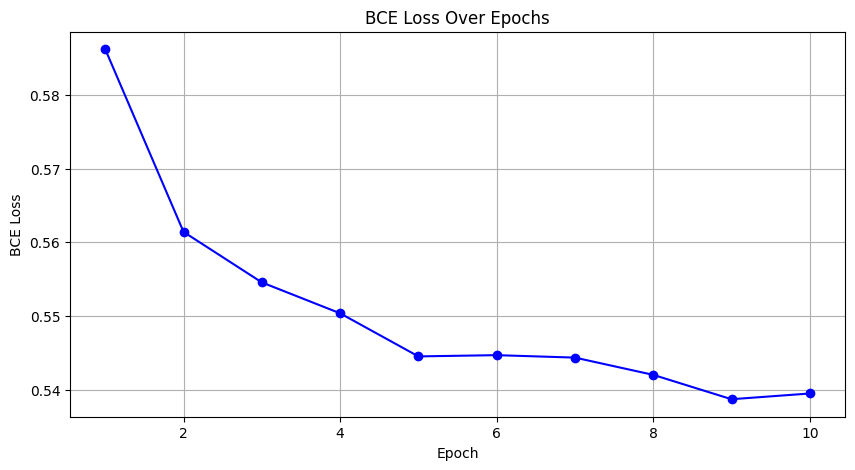

In [446]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

In [448]:
# Now lets save our trained model
# save the trained model
torch.save(model_net3, 'model_net3.pkl')

In [449]:
# Lets load the model for inference

model_net3_trained = torch.load('model_net3.pkl')

# Set the Model to Evaluation Mode
model_net3_trained.eval()

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=10, out_features=1, bias=True)
  (4): Sigmoid()
)

In [451]:
output

tensor([[0.1833]], grad_fn=<SigmoidBackward0>)

In [452]:
# Initialize a variable to store the total loss
total_loss = 0.0

# Initialize a variable to store all the predictions
all_predictions = []

# Loop over each sample in the test dataset
for i in range(X_test_tensor.size(0)):

    # Forward pass: compute predicted y by passing x to the model
    output = model_net3(X_test_tensor[i].reshape(-1))

    # Compute and print loss
    loss = loss_BCE(output, y_test_tensor[i].reshape(-1))
    total_loss += loss.item()

    # Store the predictions
    all_predictions.append(output.detach().numpy())

# Calculate the average loss over all test samples
average_loss = total_loss / X_test_tensor.size(0)
print(f'Average Loss on Test Set: {average_loss:.4f}')

# Convert all_predictions to a tensor for further calculations
all_predictions_tensor = torch.tensor(all_predictions).squeeze()


Average Loss on Test Set: 0.6290


In [453]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [454]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[822 211]
 [143 231]]


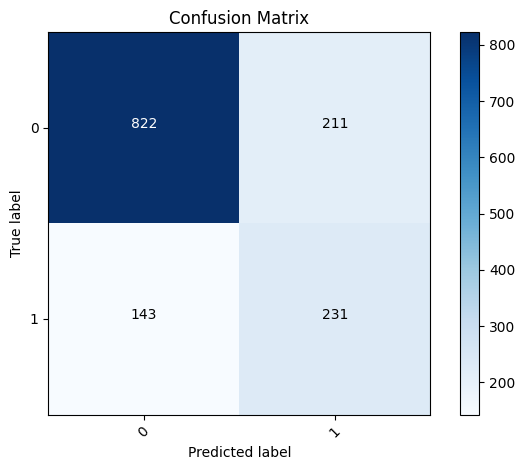

In [464]:
# Convert predicted probabilities to binary labels
threshold = 0.70
predicted_labels = (all_predictions_tensor > threshold).long()

# Calculate confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), predicted_labels.numpy())

# Plot confusion matrix
plot_confusion_matrix(cm, classes=[0, 1], title='Confusion Matrix')
plt.show()


In [465]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7484008528784648

In [466]:
# Print the parameters of all layers
for name, param in model_net3_trained.named_parameters():
    print(f"Layer: {name}")
    print(f"Size: {param.size()}")
    print(f"Values: \n{param.data}\n")

Layer: 0.weight
Size: torch.Size([10, 4])
Values: 
tensor([[ 9.2132e-02,  7.7474e-01,  1.2458e+00, -3.3623e+00],
        [-2.6328e-01,  2.0973e-01,  5.8756e-01, -6.2892e+00],
        [-2.5611e-01, -8.3212e-02,  2.9894e+00, -1.5719e+00],
        [ 9.6477e-04, -3.4006e-01, -3.3540e+00,  3.2520e+00],
        [-1.6207e-01, -4.2066e-01, -3.7306e-01, -2.2486e-01],
        [-4.5544e-01, -3.4475e-02,  2.6756e-01,  1.6341e-01],
        [ 1.9663e-01, -6.3485e-02,  5.9677e-02, -1.9468e-01],
        [ 3.0954e-01,  2.1957e-01,  3.0522e+00, -1.0236e+00],
        [-6.7085e-03, -2.2187e-01, -4.7884e+00,  5.4191e+00],
        [-3.4445e-02, -2.0919e-01,  9.1413e-01, -1.9130e+00]])

Layer: 0.bias
Size: torch.Size([10])
Values: 
tensor([ 0.3402,  0.6790, -0.9916,  0.8557, -0.0127, -0.4516, -0.2474, -1.0092,
         0.4458,  0.0926])

Layer: 3.weight
Size: torch.Size([1, 10])
Values: 
tensor([[ 0.7052,  1.1161,  0.6221, -1.1780, -0.1273, -0.2732,  0.0767,  0.7098,
         -1.2200,  0.5205]])

Layer: 3.bi